Epoch 1/10
30/30 [==============================] - 2s 13ms/step - loss: 0.0135
Epoch 2/10
30/30 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 3/10
30/30 [==============================] - 0s 12ms/step - loss: 5.6760e-04
Epoch 4/10
30/30 [==============================] - 0s 13ms/step - loss: 4.7370e-04
Epoch 5/10
30/30 [==============================] - 0s 12ms/step - loss: 4.6712e-04
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 4.5094e-04
Epoch 7/10
30/30 [==============================] - 0s 12ms/step - loss: 4.5847e-04
Epoch 8/10
30/30 [==============================] - 0s 12ms/step - loss: 4.5492e-04
Epoch 9/10
30/30 [==============================] - 0s 12ms/step - loss: 3.6638e-04
Epoch 10/10
6/6 [==============================] - 0s 6ms/step - loss: 3.6424e-04
Test Loss: 0.00036423630081117153
6/6 [==============================] - 0s 5ms/step


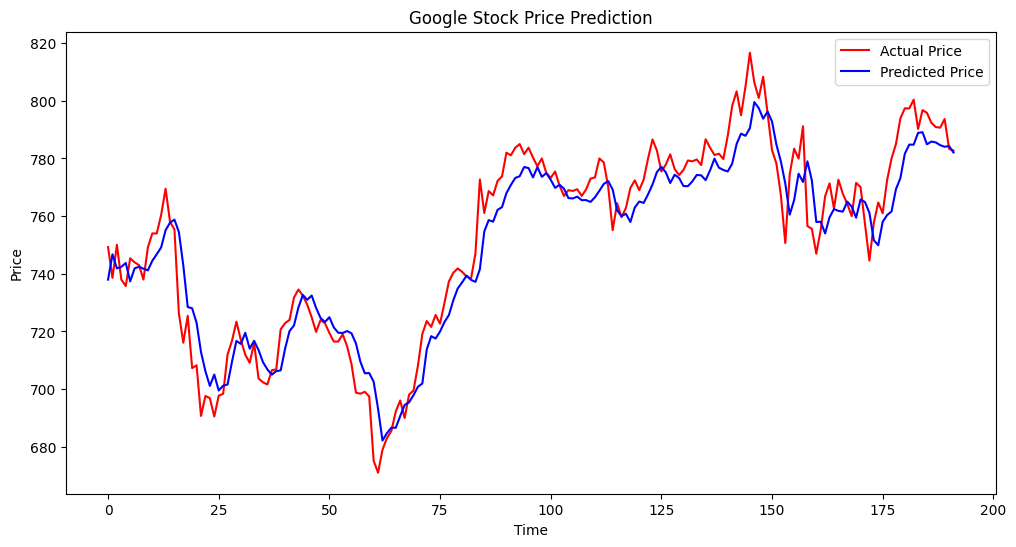

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Google_Stock_Price_Train.csv')

# Extract the 'Open' prices
prices = data['Open'].values

# Perform data scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Define the function to create input-output pairs
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Set the sequence length
sequence_length = 60

# Create training sequences
x_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
x_test, y_test = create_sequences(test_data, sequence_length)

# Build the RNN model
model = tf.keras.Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print('Test Loss:', loss)

# Make predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size + sequence_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
